# Comparison of the z_min values for circular states to Pairinteraction(v0.9) and ARC(v3.8.1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from rydstate import RydbergStateSQDTAlkali

In [2]:
n_list = list(range(15, 200))

qn_list = []
for n in n_list:
    l = {
        "circular": n - 1,
        "intermediate": (n - 1) // 2,
        "s": 0,
        "p": 1,
        "d": 2,
    }["circular"]
    j = l + 0.5
    qn_list.append((n, l, j))

In [3]:
z_i_dict = {"hydrogen": [], "classical": [], "rydstate cutoff": []}
for qn in qn_list:
    print(f"n={qn[0]}", end="\r")
    state = RydbergStateSQDTAlkali("Rb", n=qn[0], l=qn[1], j=qn[2])

    hydrogen_z_i = state.radial.model.calc_hydrogen_turning_point_z(state.n, state.l)
    z_i_dict["hydrogen"].append(hydrogen_z_i)
    z_i = state.radial.model.calc_turning_point_z(state.get_energy("a.u."))
    z_i_dict["classical"].append(z_i)

    state.radial.create_wavefunction()
    z_i_dict["rydstate cutoff"].append(state.radial.wavefunction.grid.z_min)

In [4]:
import arc
import arc_fixed

atom = arc.Rubidium87()

z_i_dict["ARC v3.8.1 cutoff"] = []
z_i_dict["ARC fixed (>=v3.9) cutoff"] = []
for use_fixed_arc in [False, True]:
    key = "ARC fixed (>=v3.9) cutoff" if use_fixed_arc else "ARC v3.8.1 cutoff"
    for qn in qn_list:
        print(f"n={qn[0]}", end="\r")
        r, psi_r = arc_fixed.radialWavefunction(atom, *qn, use_fixed_arc=use_fixed_arc)
        arg_r_min = np.argwhere(psi_r != 0).flatten()[0]
        r_min = r[arg_r_min]
        z_min = np.sqrt(r_min)
        z_i_dict[key].append(z_min)

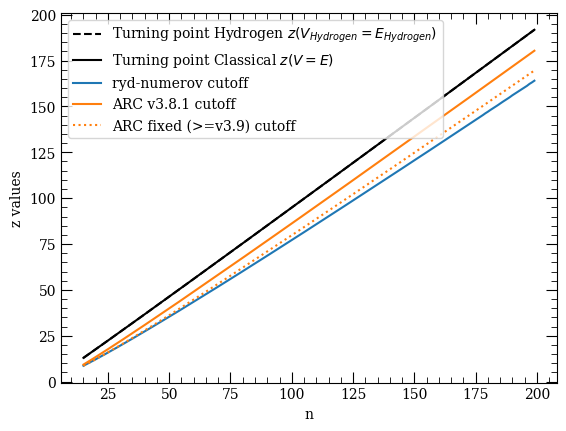

In [5]:
fig, ax = plt.subplots()

labels = {
    "classical": "Turning point Classical $z(V=E)$",
    "hydrogen": r"Turning point Hydrogen $z(V_{Hydrogen}=E_{Hydrogen})$",
}
linestyles = {
    "classical": "-",
    "hydrogen": "--",
    "ARC fixed (>=v3.9) cutoff": ":",
}
colors = {
    "rydstate cutoff": "C0",
    "ARC v3.8.1 cutoff": "C1",
    "ARC fixed (>=v3.9) cutoff": "C1",
}

for key, values in z_i_dict.items():
    ax.plot(n_list, values, ls=linestyles.get(key, "-"), color=colors.get(key, "k"), label=labels.get(key, key))

ax.set_xlabel("n")
ax.set_ylabel("z values")

ax.legend()
plt.show()